# Step 1 : Installing and Importing all Required Libraries

In [2]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importing all required plots and tools required for plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly
plotly.__version__
import dash
import dash_core_components as dcc
import dash_html_components as html

<ipython-input-4-a982d80d63dd>:16: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-4-a982d80d63dd>:17: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Setting the seaborn style to darkgrid

In [5]:
mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows',500)
sns.set(style="darkgrid")

# Step 2: Importing the Corona Cases Data from John Hopkins Data Set

In [6]:
#Importing raw covid cases data
data_path='../Task01/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_raw=pd.read_csv(data_path)
df_raw.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


# Step 3: Understanding the Data and preparation required for plotting of Covid Cases over time

In [7]:
time_idx = df_raw.columns[4:]
time_idx

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/16/22', '6/17/22', '6/18/22', '6/19/22', '6/20/22', '6/21/22',
       '6/22/22', '6/23/22', '6/24/22', '6/25/22'],
      dtype='object', length=886)

In [8]:
df_plot = pd.DataFrame({
    'date':time_idx
})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [9]:
len(df_raw['Country/Region'].unique())

199

In [10]:
df_raw[df_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [11]:
country_list=['India',
             'Germany',
              'China']

In [12]:
for each in country_list:
    df_plot[each]=np.array(df_raw[df_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [13]:
df_plot

,date,India,Germany,China
0,1/22/20,0,0,548
1,1/23/20,0,0,643
2,1/24/20,0,0,920
3,1/25/20,0,0,1406
4,1/26/20,0,0,2075
...,...,...,...,...
881,6/21/22,43331645,27454225,2116897
882,6/22/22,43344958,27573585,2118491
883,6/23/22,43362294,27681775,2120269
884,6/24/22,43378234,27771111,2122283


<AxesSubplot:xlabel='date'>

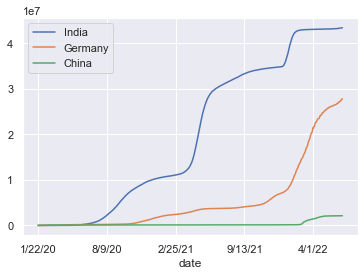

In [14]:
%matplotlib inline
df_plot.set_index('date').plot()

In [15]:
time_idx=[datetime.strptime(each,"%m/%d/%y")for each in df_plot.date]
ime_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [16]:
df_plot['date']=time_idx

In [17]:
df_plot.to_csv('../Task01/Outputs/COVID_small_flat_table.csv',sep=';')

In [18]:
df_data_base = df_raw.rename(columns={'Country/Region':'country','Province/State':'state'})

In [19]:
df_data_base=df_data_base.drop(['Lat','Long'],axis=1)
df_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [20]:
test_df= df_data_base.set_index(['state','country']).T
test_df.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [21]:
test_df.stack(level=[0,1])

         state     country             
1/22/20  NaN       Afghanistan                  0.0
                   Albania                      0.0
                   Algeria                      0.0
                   Andorra                      0.0
                   Angola                       0.0
                                             ...   
6/25/22  Zhejiang  West Bank and Gaza      658503.0
                   Winter Olympics 2022       535.0
                   Yemen                    11824.0
                   Zambia                  325110.0
                   Zimbabwe                255309.0
Length: 427052, dtype: float64

In [22]:
df_plot.head()

,date,India,Germany,China
0,2020-01-22,0,0,548
1,2020-01-23,0,0,643
2,2020-01-24,0,0,920
3,2020-01-25,0,0,1406
4,2020-01-26,0,0,2075


<Figure size 432x288 with 0 Axes>

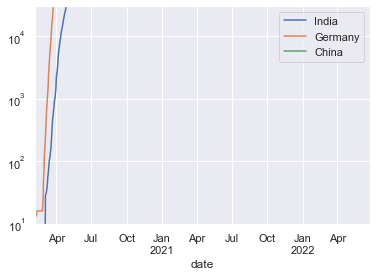

In [23]:

plt.figure();
ax = df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10,30000)
ax.set_yscale('log')


# Step 4 : Plotting of data over new tab with enhanced features

In [24]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [25]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [26]:
fig= go.Figure()
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                             y=df_plot[each],
                             mode="markers+lines",
                             opacity=0.8,
                             line_width=2,
                             marker_size=4,
                             name=each))
fig.update_layout(
    width=1600,
    height=1200,
xaxis_title="Time",
yaxis_title="Confirmed infected people (source: johns hopkins csse, log-scale)"
)
fig.update_yaxes(type="log",range=[1.1,5.5])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show(renderer='browser')

In [27]:
app=dash.Dash()
app.layout=html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
    id='country_drop_down',
    options=[
        {'label':'India','value':'India'},
        {'label':'Germay','value':'Germany'},
        {'label':'China','value':'China'}
    ],
    value=['Germany'],
    multi=True
    ),
    dcc.Graph(figure=fig,id='main_window_slope')
])

In [28]:
from dash.dependencies import Input,Output

@app.callback(
    Output('main_window_slope','figure'),
    [Input('country_drop_down','value')])
def update_figure(country_list):
    traces=[]
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                          y=df_plot[each],
                          mode='markers+lines',
                          opacity=0.8,
                          line_width=2,
                          marker_size=4,
                          name=each
                          ))
    
    return{
        'data':traces,
        'layout':dict(
             width=1280,
             height=720,
             xaxis_title="Time",
             yaxis_title="Confirmed infected people (source: Johns hopkins csse, log-scale)",
            xaxis={'tickangle':-45,
                   'nticks':20,
                   'tickfont':dict(size=14,color="#7f7f7f"),
            },
            yaxis={'type':'log',
                   'range':'[1.1,5.5]'
                
            }
        )
    }

# Click on the below URL to see the final plot for Absolut Covid Cases over time.

In [ ]:
app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
